In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import datetime

In [3]:
# csv file paths
amazon_daily_path = "Resources/amazon_daily_stock.csv"
target_daily_path = "Resources/target_daily_stock.csv"
covid_path = "Resources/covid_testing.csv"

In [4]:
#read file paths
amazon_daily = pd.read_csv(amazon_daily_path)
target_daily = pd.read_csv(target_daily_path)
covid_daily = pd.read_csv(covid_path)

In [70]:
#merge target and amazon dataset
amzn_tgt_df = pd.merge(amazon_daily, target_daily ,how='outer', on='date', suffixes = ('_Amazon', '_Target'))

In [71]:
amzn_tgt_df.head()

date  Open_Amazon  High_Amazon   Low_Amazon  Close_Amazon  \
0  1/27/2020  1820.000000  1841.000000  1815.339966   1828.339966   
1  1/28/2020  1840.500000  1858.109985  1830.020020   1853.250000   
2  1/29/2020  1864.000000  1874.750000  1855.020020   1858.000000   
3  1/30/2020  1858.000000  1872.869995  1850.609985   1870.680054   
4  1/31/2020  2051.469971  2055.719971  2002.270020   2008.719971   

   Adj Close_Amazon  Volume_Amazon  Open_Target  High_Target  Low_Target  \
0       1828.339966      3528500.0   112.949997   116.209999  112.570000   
1       1853.250000      2808000.0   116.150002   116.459999  115.430000   
2       1858.000000      2088000.0   115.779999   116.080002  114.250000   
3       1870.680054      6327400.0   113.769997   114.709999  112.889999   
4       2008.719971     15567300.0   113.410004   113.790001  110.370003   

   Close_Target  Adj Close_Target  Volume_Target  
0    115.779999        113.485497        6779200  
1    115.440002        113.152229        3865100  
2    114.269997        112.005417        5250600  
3    114.669998        112.397491        4466400  
4    110.739998        108.545372        6961900

In [18]:
#create death increase per positivty increase 
covid_daily['death_per_positive']= covid_daily['deathIncrease']/ covid_daily['positiveIncrease']

In [28]:
covid_daily['ventilator_%']= covid_daily['onVentilatorCurrently']/ covid_daily['hospitalizedCurrently']

In [29]:
covid_daily.head()

date     death  deathIncrease  inIcuCumulative  inIcuCurrently  \
0  2021-01-22  404695.0           3980          40687.0         22008.0   
1  2021-01-21  400715.0           3878          40481.0         22309.0   
2  2021-01-20  396837.0           4409          40340.0         22809.0   
3  2021-01-19  392428.0           2141          40103.0         23029.0   
4  2021-01-18  390287.0           1395          39973.0         23226.0   

   hospitalizedIncrease  hospitalizedCurrently  hospitalizedCumulative  \
0                  4325               116264.0                776384.0   
1                  4053               119949.0                772059.0   
2                  5105               122700.0                768006.0   
3                  3206               123820.0                762901.0   
4                  2839               123848.0                759695.0   

      negative  negativeIncrease  onVentilatorCumulative  \
0  221900013.0           1375093                  3919.0   
1  220524920.0           1263704                  3910.0   
2  219261216.0           1283431                  3897.0   
3  217977785.0           1301789                  3883.0   
4  216675996.0           1679248                  3865.0   

   onVentilatorCurrently    positive  positiveIncrease  states  \
0                 7236.0  24483676.0            188983      56   
1                 7370.0  24294693.0            184033      56   
2                 7564.0  24110660.0            186722      56   
3                 7688.0  23923938.0            144047      56   
4                 7772.0  23779891.0            150220      56   

   totalTestResults  totalTestResultsIncrease  death_per_posivity  \
0         291407518                   1988756            2.141436   
1         289418762                   1899019            2.177408   
2         287519743                   1788698            2.125283   
3         285731045                   1698121            2.724305   
4         284032924                   2088685            2.598103   

   death_per_positive  ventilator_%  
0            0.021060      0.062238  
1            0.021072      0.061443  
2            0.023613      0.061646  
3            0.014863      0.062090  
4            0.009286      0.062754

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

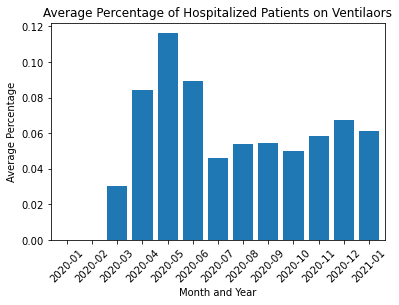

In [53]:
vent_bar = month_groupby['ventilator_%'].mean().plot.bar(width=.8)

vent_bar.set_title("Average Percentage of Hospitalized Patients on Ventilaors")
vent_bar.set_xlabel("Month and Year")
vent_bar.set_ylabel("Average Percentage")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

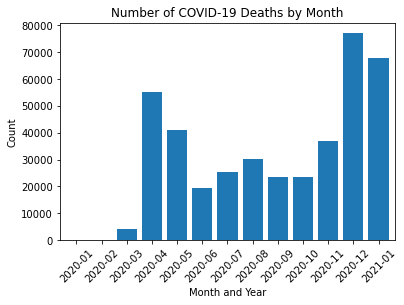

In [31]:
death_bar = month_groupby['deathIncrease'].sum().plot.bar(width=.8)

death_bar.set_title("Number of COVID-19 Deaths by Month")
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Count")

plt.xticks(rotation=45)

In [72]:
#merge stock and covid dataset on date
stock_covid_merge = pd.merge(amzn_tgt_df, covid_daily ,how='outer', on="date")

In [73]:
#convert date column into datetime format for grouping

stock_covid_merge['new_datetime'] = pd.to_datetime(stock_covid_merge['date'])

In [75]:
stock_covid_merge.head()

date  Open_Amazon  High_Amazon   Low_Amazon  Close_Amazon  \
0  1/27/2020  1820.000000  1841.000000  1815.339966   1828.339966   
1  1/28/2020  1840.500000  1858.109985  1830.020020   1853.250000   
2  1/29/2020  1864.000000  1874.750000  1855.020020   1858.000000   
3  1/30/2020  1858.000000  1872.869995  1850.609985   1870.680054   
4  1/31/2020  2051.469971  2055.719971  2002.270020   2008.719971   

   Adj Close_Amazon  Volume_Amazon  Open_Target  High_Target  Low_Target  ...  \
0       1828.339966      3528500.0   112.949997   116.209999  112.570000  ...   
1       1853.250000      2808000.0   116.150002   116.459999  115.430000  ...   
2       1858.000000      2088000.0   115.779999   116.080002  114.250000  ...   
3       1870.680054      6327400.0   113.769997   114.709999  112.889999  ...   
4       2008.719971     15567300.0   113.410004   113.790001  110.370003  ...   

   onVentilatorCurrently  positive  positiveIncrease  states  \
0                    NaN       NaN               NaN     NaN   
1                    NaN       NaN               NaN     NaN   
2                    NaN       NaN               NaN     NaN   
3                    NaN       NaN               NaN     NaN   
4                    NaN       NaN               NaN     NaN   

   totalTestResults  totalTestResultsIncrease  death_per_posivity  \
0               NaN                       NaN                 NaN   
1               NaN                       NaN                 NaN   
2               NaN                       NaN                 NaN   
3               NaN                       NaN                 NaN   
4               NaN                       NaN                 NaN   

   death_per_positive  ventilator_%  new_datetime  
0                 NaN           NaN    2020-01-27  
1                 NaN           NaN    2020-01-28  
2                 NaN           NaN    2020-01-29  
3                 NaN           NaN    2020-01-30  
4                 NaN           NaN    2020-01-31  

[5 rows x 33 columns]

In [76]:
#create new Month_year data for grouping monthly data
stock_covid_merge['Month_year']= stock_covid_merge['new_datetime'].dt.strftime('%Y-%m')

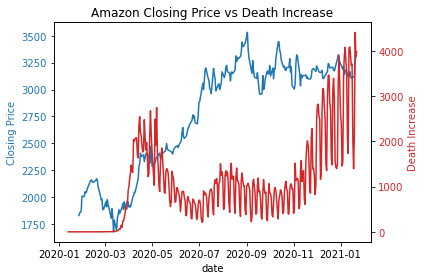

In [77]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Amazon'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Amazon Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()

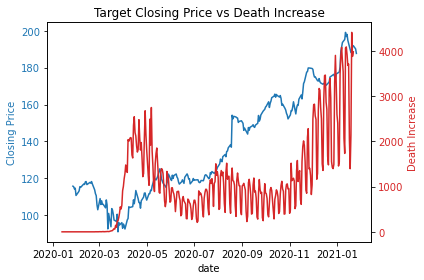

In [79]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Target'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Target Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()

In [80]:
#groupby month_year
month_groupby = stock_covid_merge.groupby('Month_year')
month_groupby.describe()

Open_Amazon                                                     \
                 count         mean         std          min          25%   
Month_year                                                                  
2020-01            5.0  1886.793994   93.636811  1820.000000  1840.500000   
2020-02           19.0  2065.853683   95.217165  1814.630005  2018.510010   
2020-03           22.0  1863.148626   90.505695  1641.510010  1788.539978   
2020-04           21.0  2216.111439  203.754240  1901.640015  2021.000000   
2020-05           20.0  2391.137012   56.810849  2256.379883  2365.352539   
2020-06           22.0  2608.350009  109.128363  2444.510010  2506.799988   
2020-07           22.0  3053.884100  117.686174  2757.989990  3002.399963   
2020-08           21.0  3241.426676  104.556890  3101.209961  3173.120117   
2020-09           21.0  3180.540946  169.306932  2906.500000  3054.860107   
2020-10           22.0  3241.358642   92.507103  3135.000000  3190.152588   
2020-11           20.0  3147.326501   77.656034  3018.530029  3099.130005   
2020-12           22.0  3199.929066   59.589814  3088.989990  3169.919922   
2021-01           13.0  3168.343844   55.503965  3107.000000  3128.439941   

                                                  High_Amazon               \
                    50%          75%          max       count         mean   
Month_year                                                                   
2020-01     1858.000000  1864.000000  2051.469971         5.0  1900.489990   
2020-02     2071.020020  2147.944946  2173.070068        19.0  2094.268979   
2020-03     1888.500000  1929.722504  1975.369995        22.0  1910.390004   
2020-04     2330.010010  2389.949951  2443.199951        21.0  2256.839989   
2020-05     2379.555054  2419.412475  2500.000000        20.0  2418.904004   
2020-06     2632.500000  2684.927551  2780.000000        22.0  2641.895441   
2020-07     3056.410034  3111.559998  3251.060059        22.0  3107.896373   
2020-08     3212.000000  3303.010010  3450.050049        21.0  3284.938570   
2020-09     3148.850098  3208.689941  3547.000000        21.0  3221.151425   
2020-10     3211.250000  3281.332520  3467.989990        22.0  3283.250888   
2020-11     3128.000000  3189.775024  3319.969971        20.0  3179.721472   
2020-12     3196.104981  3217.602417  3341.000000        22.0  3226.707242   
2021-01     3157.000000  3180.000000  3293.000000        13.0  3205.726131   

            ... death_per_positive           ventilator_%                      \
            ...                75%       max        count      mean       std   
Month_year  ...                                                                 
2020-01     ...           0.000000  0.000000          0.0       NaN       NaN   
2020-02     ...           0.166667  1.000000          0.0       NaN       NaN   
2020-03     ...           0.026637  0.125000          7.0  0.030123  0.002428   
2020-04     ...           0.069849  0.102231         30.0  0.084259  0.028785   
2020-05     ...           0.065602  0.111439         31.0  0.116257  0.016184   
2020-06     ...           0.035614  0.052376         30.0  0.089407  0.017194   
2020-07     ...           0.016099  0.023432         31.0  0.045999  0.005288   
2020-08     ...           0.024906  0.031305         31.0  0.053904  0.002731   
2020-09     ...           0.023926  0.035402         30.0  0.054291  0.003329   
2020-10     ...           0.015249  0.018854         31.0  0.049802  0.002181   
2020-11     ...           0.010503  0.016853         30.0  0.058336  0.005625   
2020-12     ...           0.014611  0.017264         31.0  0.067654  0.002037   
2021-01     ...           0.017454  0.023613         22.0  0.061409  0.001327   

                                                              
                 min       25%       50%       75%       max  
Month_year                                                    
2020-01          NaN       NaN       NaN   

In [81]:
month_groupby.head()

date  Open_Amazon  High_Amazon   Low_Amazon  Close_Amazon  \
0    1/27/2020  1820.000000  1841.000000  1815.339966   1828.339966   
1    1/28/2020  1840.500000  1858.109985  1830.020020   1853.250000   
2    1/29/2020  1864.000000  1874.750000  1855.020020   1858.000000   
3    1/30/2020  1858.000000  1872.869995  1850.609985   1870.680054   
4    1/31/2020  2051.469971  2055.719971  2002.270020   2008.719971   
..         ...          ...          ...          ...           ...   
237   1/4/2021  3270.000000  3272.000000  3144.020020   3186.629883   
238   1/5/2021  3166.010010  3223.379883  3165.060059   3218.510010   
239   1/6/2021  3146.479980  3197.510010  3131.159912   3138.379883   
240   1/7/2021  3157.000000  3208.540039  3155.000000   3162.159912   
241   1/8/2021  3180.000000  3190.639893  3142.199951   3182.699951   

     Adj Close_Amazon  Volume_Amazon  Open_Target  High_Target  Low_Target  \
0         1828.339966      3528500.0   112.949997   116.209999  112.570000   
1         1853.250000      2808000.0   116.150002   116.459999  115.430000   
2         1858.000000      2088000.0   115.779999   116.080002  114.250000   
3         1870.680054      6327400.0   113.769997   114.709999  112.889999   
4         2008.719971     15567300.0   113.410004   113.790001  110.370003   
..                ...            ...          ...          ...         ...   
237       3186.629883      4411400.0   176.509995   178.089996  174.119995   
238       3218.510010      2655500.0   176.800003   181.970001  176.429993   
239       3138.379883      4394800.0   180.330002   189.470001  180.110001   
240       3162.159912      3514500.0   189.210007   192.350006  189.169998   
241       3182.699951      3537700.0   191.580002   193.880005  190.809998   

     ...  positive  positiveIncrease  states  totalTestResults  \
0    ...       NaN               NaN     NaN               NaN   
1    ...       NaN               NaN     NaN               NaN   
2    ...       NaN               NaN     NaN               NaN   
3    ...       NaN               NaN     NaN               NaN   
4    ...       NaN               NaN     NaN               NaN   
..   ...       ...               ...     ...               ...   
237  ...       NaN               NaN     NaN               NaN   
238  ...       NaN               NaN     NaN               NaN   
239  ...       NaN               NaN     NaN               NaN   
240  ...       NaN               NaN     NaN               NaN   
241  ...       NaN               NaN     NaN               NaN   

     totalTestResultsIncrease  death_per_posivity  death_per_positive  \
0                         NaN                 NaN                 NaN   
1                         NaN                 NaN                 NaN   
2                         NaN                 NaN                 NaN   
3                         NaN                 NaN                 NaN   
4                         NaN                 NaN                 NaN   
..                        ...                 ...                 ...   
237                       NaN                 NaN                 NaN   
238                       NaN                 NaN                 NaN   
239                       NaN                 NaN                 NaN   
240                       NaN                 NaN                 NaN   
241                       NaN                 NaN                 NaN   

     ventilator_%  new_datetime  Month_year  
0             NaN    2020-01-27     2020-01  
1             NaN    2020-01-28     2020-01  
2             NaN    2020-01-29     2020-01  
3             NaN    2020-01-30     2020-01  
4             NaN    2020-01-31     2020-01  
..            ...           ...         ...  
237           NaN    2021-01-04     2021-01  
238           NaN    2021-01-05     2021-01  
239           NaN    2021-01-06     2021-01  
240           NaN    2021-01-07     2021-01  
241           NaN    2021-01-08     2021-01 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

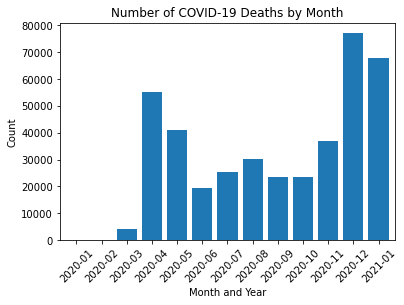

In [45]:
death_bar = month_groupby['deathIncrease'].sum().plot.bar(width=.8)

death_bar.set_title("Number of COVID-19 Deaths by Month")
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Count")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

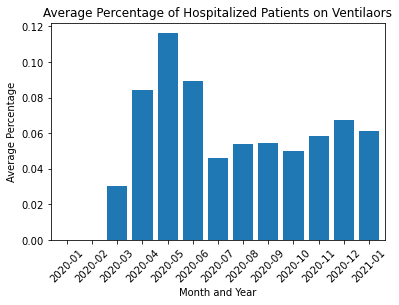

In [78]:
vent_bar = month_groupby['ventilator_%'].mean().plot.bar(width=.8)

vent_bar.set_title("Average Percentage of Hospitalized Patients on Ventilaors")
vent_bar.set_xlabel("Month and Year")
vent_bar.set_ylabel("Average Percentage")

plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01')])

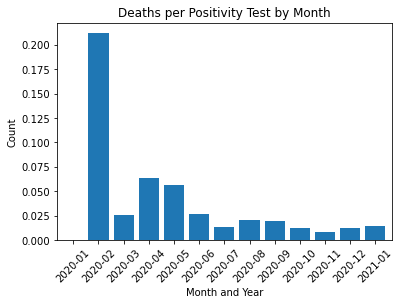

In [84]:
death_bar = month_groupby['death_per_positive'].mean().plot.bar(width=.8)

death_bar.set_title("Average Deaths per Positivity Rate by Month")
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Count")

plt.xticks(rotation=45)